## Contents
1) Importing Libraries and Data
2) Data Cleaning & Standardization
3) Elbow Technique
4) K-Mean Clustering & Cluter Visualizations
5) Cluster Descriptive Statistical Analysis
6) Cluster Visualization Analysis
7) Extra Visualizations (Bar Graphs using categorical data with cluster data)
8) Exporting Dataframe (new dataframe created due to merged data with cluster information)

### 1) Importing Libraries and Data

In [20]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [2]:
# Ensuring created graphs are displayed without the need to call them specifically.

%matplotlib inline

In [3]:
path=r'C:\Users\Drew\Superstore'

In [4]:
df=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','product_sales_cleaned.csv'))

In [5]:
df.shape

(9993, 21)

In [6]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_segment,country,city,state,postal_code,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,total_orders,buyer_behavior_segment
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,5,Occasional Buyer
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,5,Occasional Buyer
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,9,Occasional Buyer
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,15,Consistent Buyer
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,15,Consistent Buyer


### 2) Data Cleaning & Standardization

In [17]:
# removing categorical columns to make only numerical column subset

num_cols=df[['sales','profit','quantity','total_orders']]

In [18]:
num_cols.head()

,sales,profit,quantity,total_orders
0,261.96,41.91,2,5
1,731.94,219.58,3,5
2,14.62,6.87,2,9
3,957.58,-383.03,5,15
4,22.37,2.52,2,15


In [21]:
# Standarizing data columns
scaler=StandardScaler()
num_cols_scaled=scaler.fit_transform(num_cols)

# Converting standardized data back to a dataframe
df_scaled=pd.DataFrame(num_cols_scaled,columns=num_cols.columns)

### 3) Elbow Technique

In [24]:
# Defining range of potential clusters

num_clusters=range(1,10)

# Defining kmeans clusters from the range above

kmeans=[KMeans(n_clusters=i,n_init=10) for i in num_clusters]

In [25]:
# Creating score representing a rate of variation for the given cluster option.

score=[kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]

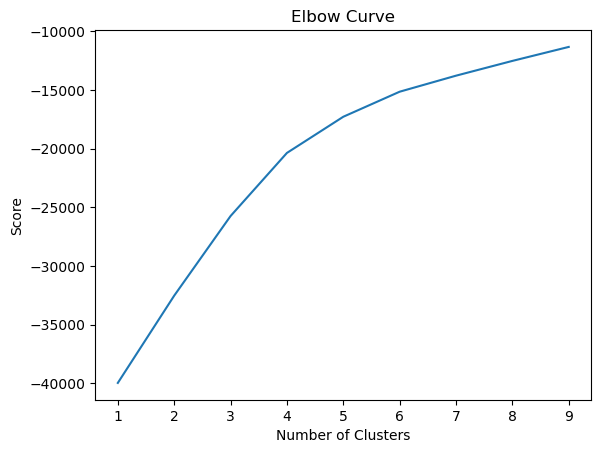

In [26]:
# Plotting elbow curve using Pylab

pl.plot(num_clusters,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 4) K-Means Clustering & Cluster Visualizations

In [29]:
# Defining number of clusters based on above elbow curve

kmeans=KMeans(n_clusters=3,n_init='auto')

#### Reason for 3 Clusters: When reviewing the above map, it is seen that at around 3 there is the biggest drop in the score y column compared to other clusters. Also, we can see that here is where the bend seems to really start to take appearance.  

In [30]:
# Fitting the k-means (definied clusters) to the data

kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init='auto')

In [31]:
#Creating clusters column

df_scaled['clusters']=kmeans.fit_predict(df_scaled)

In [32]:
# Checking newly created clusters column

df_scaled.head()

,sales,profit,quantity,total_orders,clusters
0,0.051516,0.056557,-0.804370,-1.606771,0
1,0.805602,0.814988,-0.354939,-1.606771,0
2,-0.345342,-0.093021,-0.804370,-1.005428,0
3,1.167642,-1.757412,0.543922,-0.103413,1
4,-0.332907,-0.111590,-0.804370,-0.103413,0


In [33]:
# Clusters columns value count check

df_scaled['clusters'].value_counts()

clusters
0    6788
1    3178
2      27
Name: count, dtype: int64

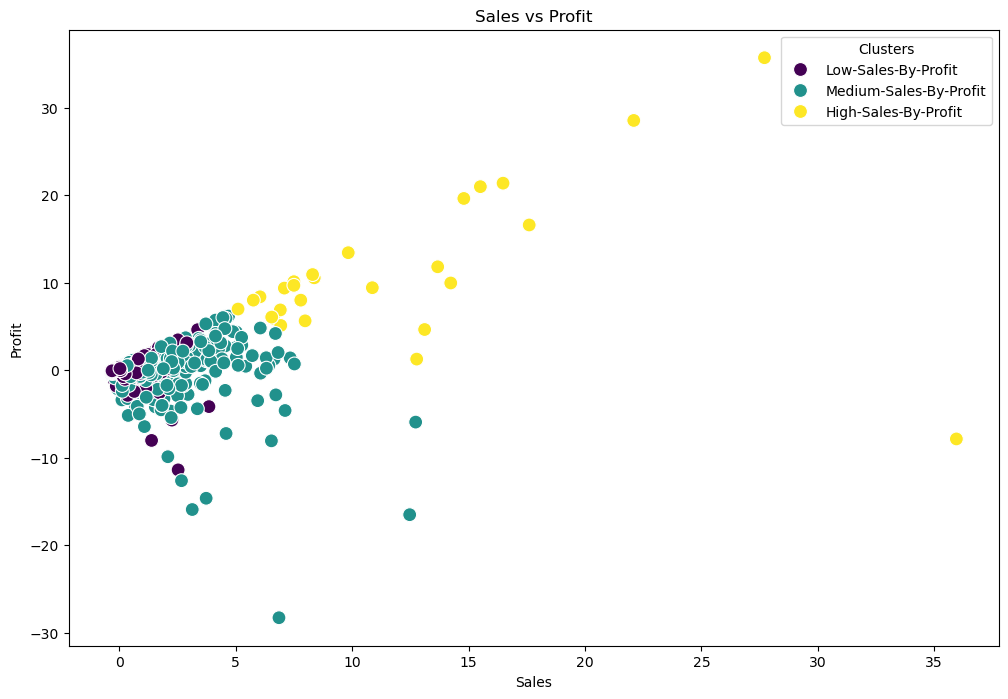

In [179]:
# Plotting clusters for "Profit" and "Sales" variables

sales_profit_cluster_scatterplot=plt.figure(figsize=(12,8))
ax=sns.scatterplot(x=df_scaled['sales'],y=df_scaled['profit'],hue=kmeans.labels_,palette='viridis',s=100)
ax.grid(False)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit')
legend_labels = {0: 'Low-Sales-By-Profit', 1: 'Medium-Sales-By-Profit', 2: 'High-Sales-By-Profit'}
handles, labels = ax.get_legend_handles_labels()
labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, labels, title="Clusters")
plt.show()

# Exporting Visual
sales_profit_cluster_scatterplot.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','sales_profit_cluster_scatterplot.png'))

In [115]:
# Creating new columns based on sales and profit clusters

df_scaled.loc[df_scaled['clusters']==0,'cluster_sales_by_profit']='Low-Sales-By-Profit'
df_scaled.loc[df_scaled['clusters']==1,'cluster_sales_by_profit']='Medium-Sales-By-Profit'
df_scaled.loc[df_scaled['clusters']==2,'cluster_sales_by_profit']='High-Sales-By-Profit'

In [118]:
df_scaled.head()

,sales,profit,quantity,total_orders,clusters,cluster_sales_total_orders,cluster_sales_quantity,cluster_profit_total_orders,cluster_profit_quantity,cluster_sales_by_profit
0,0.051516,0.056557,-0.804370,-1.606771,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit
1,0.805602,0.814988,-0.354939,-1.606771,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit
2,-0.345342,-0.093021,-0.804370,-1.005428,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit
3,1.167642,-1.757412,0.543922,-0.103413,1,Medium-Sales-By-Orders,Medium-Sales-By-Quantity,Medium-Profit-By-Orders,Medium-Profit-By-Quantity,Medium-Sales-By-Profit
4,-0.332907,-0.111590,-0.804370,-0.103413,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit


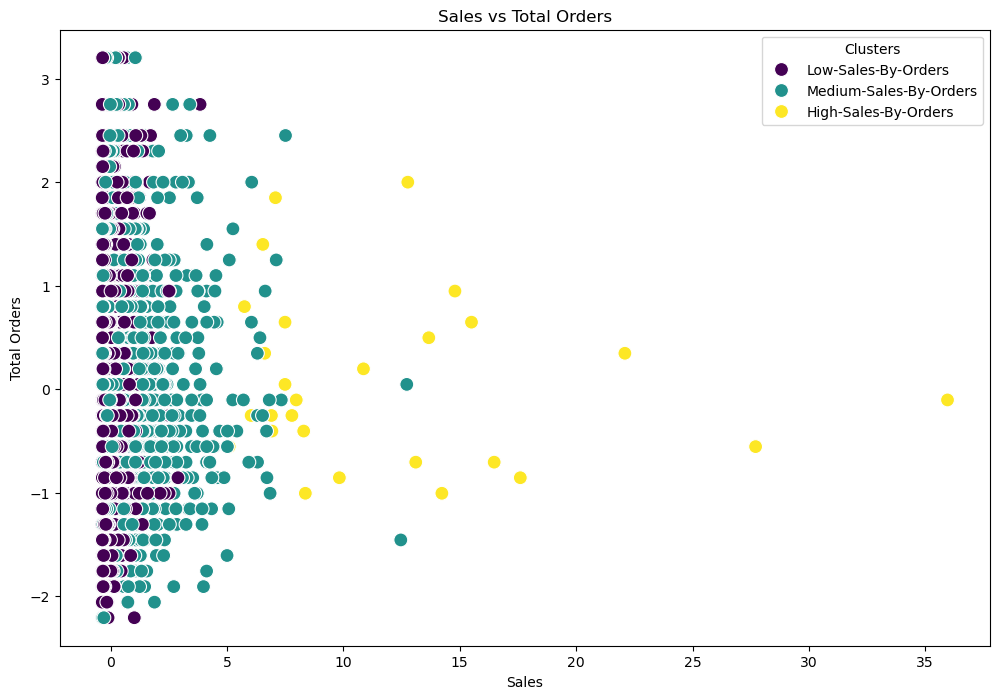

In [180]:
# Plotting clusters using "sales" and "total_orders"

sales_total_orders_cluster_scatterplot=plt.figure(figsize=(12,8))
ax=sns.scatterplot(x=df_scaled['sales'],y=df_scaled['total_orders'],hue=kmeans.labels_,palette='viridis',s=100)
ax.grid(False)
plt.xlabel('Sales')
plt.ylabel('Total Orders')
plt.title('Sales vs Total Orders')
legend_labels = {0: 'Low-Sales-By-Orders', 1: 'Medium-Sales-By-Orders', 2: 'High-Sales-By-Orders'}
handles, labels = ax.get_legend_handles_labels()
labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, labels, title="Clusters")
plt.show()

# Exporting Visual
sales_total_orders_cluster_scatterplot.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','sales_total_orders_cluster_scatterplot.png'))

In [101]:
# Creating new columns based on sales and total orders clusters

df_scaled.loc[df_scaled['clusters']==0,'cluster_sales_total_orders']='Low-Sales-By-Orders'
df_scaled.loc[df_scaled['clusters']==1,'cluster_sales_total_orders']='Medium-Sales-By-Orders'
df_scaled.loc[df_scaled['clusters']==2,'cluster_sales_total_orders']='High-Sales-By-Orders'

In [122]:
df_scaled.head()

,sales,profit,quantity,total_orders,clusters,cluster_sales_total_orders,cluster_sales_quantity,cluster_profit_total_orders,cluster_profit_quantity,cluster_sales_by_profit
0,0.051516,0.056557,-0.804370,-1.606771,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit
1,0.805602,0.814988,-0.354939,-1.606771,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit
2,-0.345342,-0.093021,-0.804370,-1.005428,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit
3,1.167642,-1.757412,0.543922,-0.103413,1,Medium-Sales-By-Orders,Medium-Sales-By-Quantity,Medium-Profit-By-Orders,Medium-Profit-By-Quantity,Medium-Sales-By-Profit
4,-0.332907,-0.111590,-0.804370,-0.103413,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit


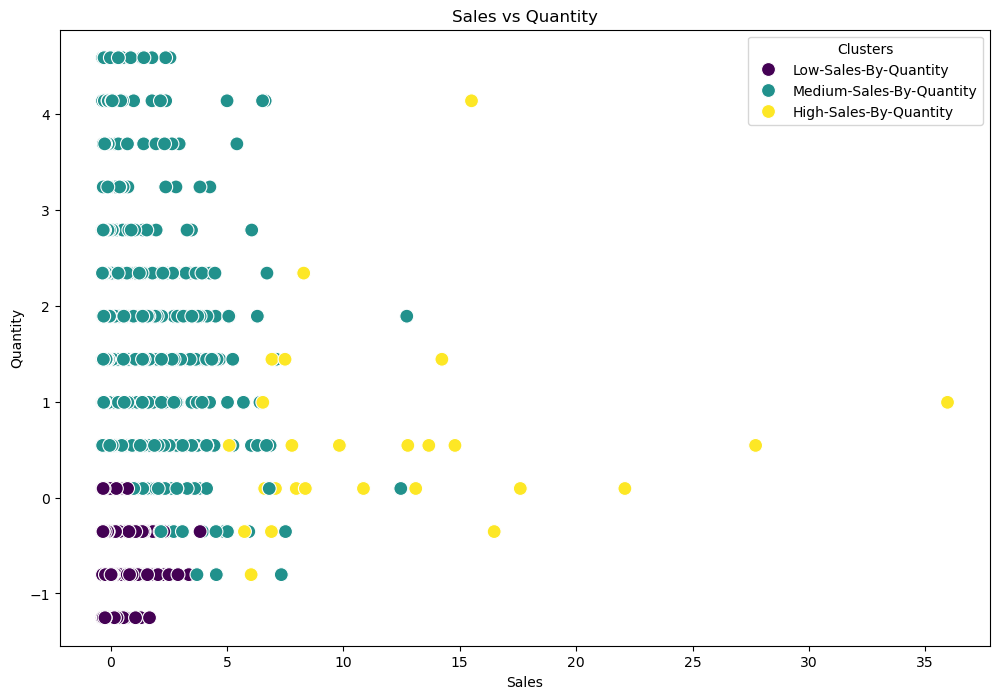

In [181]:
# Plotting clusters using 'sales' and 'quantity'

sales_quantity_cluster_scatterplot=plt.figure(figsize=(12,8))
ax=sns.scatterplot(x=df_scaled['sales'],y=df_scaled['quantity'],hue=kmeans.labels_,palette='viridis',s=100)
ax.grid(False)
plt.xlabel('Sales')
plt.ylabel('Quantity')
plt.title('Sales vs Quantity')
legend_labels = {0: 'Low-Sales-By-Quantity', 1: 'Medium-Sales-By-Quantity', 2: 'High-Sales-By-Quantity'}
handles, labels = ax.get_legend_handles_labels()
labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, labels, title="Clusters")
plt.show()

# Exporting Visual
sales_quantity_cluster_scatterplot.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','sales_quantity_cluster_scatterplot.png'))

In [104]:
# Creating new columns based on sales and quantity clusters

df_scaled.loc[df_scaled['clusters']==0,'cluster_sales_quantity']='Low-Sales-By-Quantity'
df_scaled.loc[df_scaled['clusters']==1,'cluster_sales_quantity']='Medium-Sales-By-Quantity'
df_scaled.loc[df_scaled['clusters']==2,'cluster_sales_quantity']='High-Sales-By-Quantity'

In [121]:
df_scaled.head()

,sales,profit,quantity,total_orders,clusters,cluster_sales_total_orders,cluster_sales_quantity,cluster_profit_total_orders,cluster_profit_quantity,cluster_sales_by_profit
0,0.051516,0.056557,-0.804370,-1.606771,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit
1,0.805602,0.814988,-0.354939,-1.606771,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit
2,-0.345342,-0.093021,-0.804370,-1.005428,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit
3,1.167642,-1.757412,0.543922,-0.103413,1,Medium-Sales-By-Orders,Medium-Sales-By-Quantity,Medium-Profit-By-Orders,Medium-Profit-By-Quantity,Medium-Sales-By-Profit
4,-0.332907,-0.111590,-0.804370,-0.103413,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit


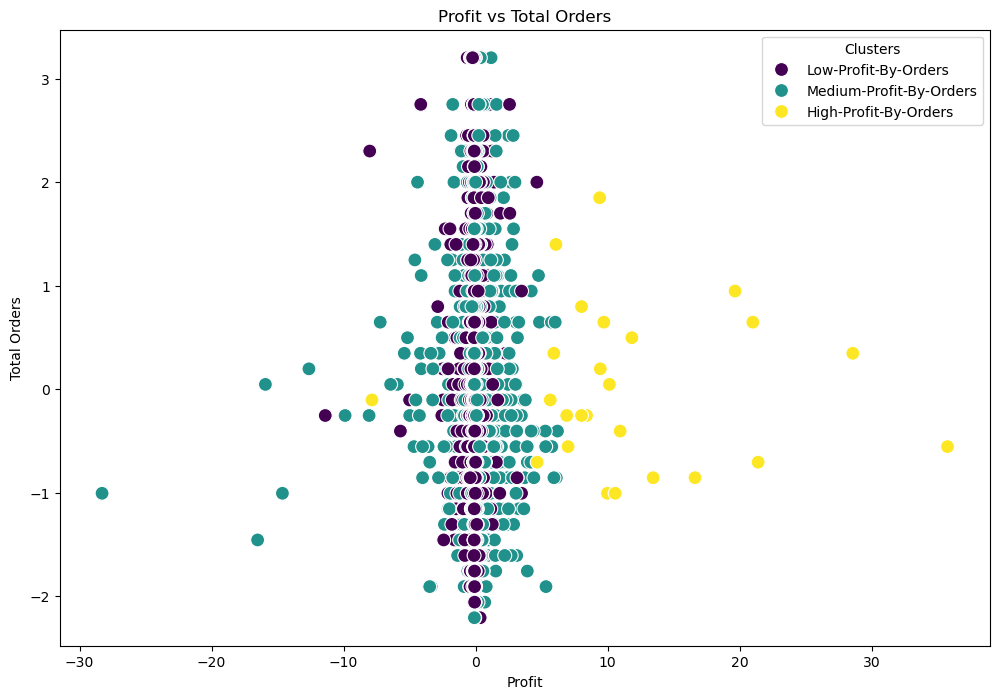

In [182]:
# Plotting clusters using 'profit' and 'total_orders'

profit_total_orders_cluster_scatterplot=plt.figure(figsize=(12,8))
ax=sns.scatterplot(x=df_scaled['profit'],y=df_scaled['total_orders'],hue=kmeans.labels_,palette='viridis',s=100)
ax.grid(False)
plt.xlabel('Profit')
plt.ylabel('Total Orders')
plt.title('Profit vs Total Orders')
legend_labels = {0: 'Low-Profit-By-Orders', 1: 'Medium-Profit-By-Orders', 2: 'High-Profit-By-Orders'}
handles, labels = ax.get_legend_handles_labels()
labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, labels, title="Clusters")
plt.show()

# Exporting Visual
profit_total_orders_cluster_scatterplot.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','profit_total_orders_cluster_scatterplot.png'))

In [110]:
# Creating new columns based on profit and total orders clusters

df_scaled.loc[df_scaled['clusters']==0,'cluster_profit_total_orders']='Low-Profit-By-Orders'
df_scaled.loc[df_scaled['clusters']==1,'cluster_profit_total_orders']='Medium-Profit-By-Orders'
df_scaled.loc[df_scaled['clusters']==2,'cluster_profit_total_orders']='High-Profit-By-Orders'

In [120]:
df_scaled.head()

,sales,profit,quantity,total_orders,clusters,cluster_sales_total_orders,cluster_sales_quantity,cluster_profit_total_orders,cluster_profit_quantity,cluster_sales_by_profit
0,0.051516,0.056557,-0.804370,-1.606771,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit
1,0.805602,0.814988,-0.354939,-1.606771,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit
2,-0.345342,-0.093021,-0.804370,-1.005428,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit
3,1.167642,-1.757412,0.543922,-0.103413,1,Medium-Sales-By-Orders,Medium-Sales-By-Quantity,Medium-Profit-By-Orders,Medium-Profit-By-Quantity,Medium-Sales-By-Profit
4,-0.332907,-0.111590,-0.804370,-0.103413,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit


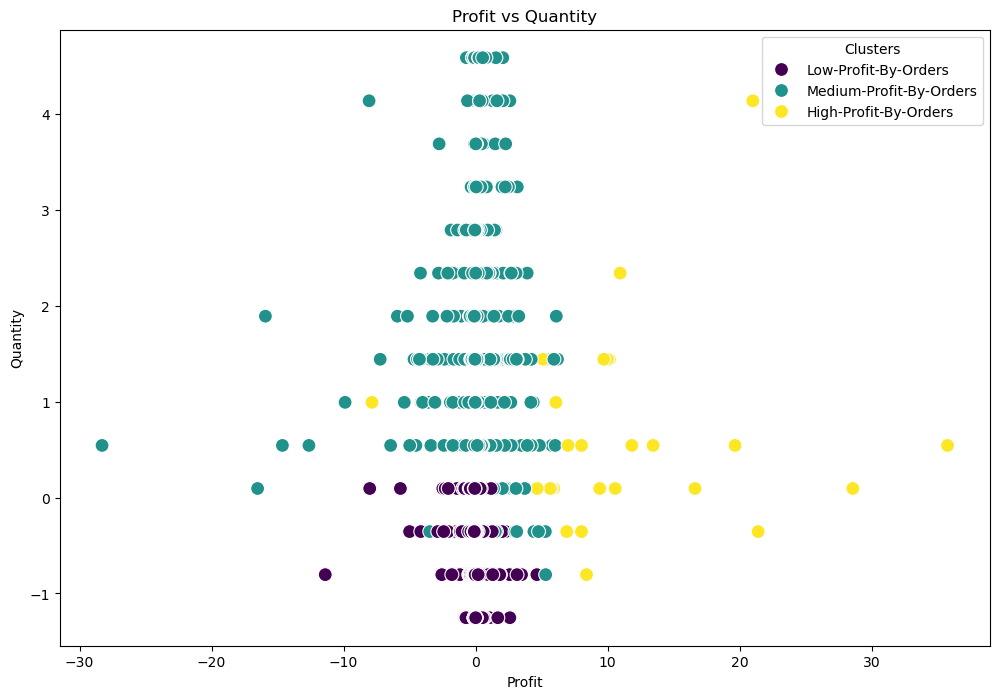

In [183]:
# Plotting clusters using 'profit' and 'quantity'

profit_quantity_scatterplot=plt.figure(figsize=(12,8))
ax=sns.scatterplot(x=df_scaled['profit'],y=df_scaled['quantity'],hue=kmeans.labels_,palette='viridis',s=100)
ax.grid(False)
plt.xlabel('Profit')
plt.ylabel('Quantity')
plt.title('Profit vs Quantity')
legend_labels = {0: 'Low-Profit-By-Orders', 1: 'Medium-Profit-By-Orders', 2: 'High-Profit-By-Orders'}
handles, labels = ax.get_legend_handles_labels()
labels = [legend_labels[int(label)] for label in labels]
ax.legend(handles, labels, title="Clusters")
plt.show()

# Exporting Visual
profit_quantity_scatterplot.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','profit_quantity_scatterplot.png'))

In [113]:
# Creating new columns based on profit and quantity clusters

df_scaled.loc[df_scaled['clusters']==0,'cluster_profit_quantity']='Low-Profit-By-Quantity'
df_scaled.loc[df_scaled['clusters']==1,'cluster_profit_quantity']='Medium-Profit-By-Quantity'
df_scaled.loc[df_scaled['clusters']==2,'cluster_profit_quantity']='High-Profit-By-Quantity'

In [119]:
df_scaled.head()

,sales,profit,quantity,total_orders,clusters,cluster_sales_total_orders,cluster_sales_quantity,cluster_profit_total_orders,cluster_profit_quantity,cluster_sales_by_profit
0,0.051516,0.056557,-0.804370,-1.606771,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit
1,0.805602,0.814988,-0.354939,-1.606771,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit
2,-0.345342,-0.093021,-0.804370,-1.005428,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit
3,1.167642,-1.757412,0.543922,-0.103413,1,Medium-Sales-By-Orders,Medium-Sales-By-Quantity,Medium-Profit-By-Orders,Medium-Profit-By-Quantity,Medium-Sales-By-Profit
4,-0.332907,-0.111590,-0.804370,-0.103413,0,Low-Sales-By-Orders,Low-Sales-By-Quantity,Low-Profit-By-Orders,Low-Profit-By-Quantity,Low-Sales-By-Profit


### 5) Cluster Descriptive Statistics Analysis

In [149]:
# Creating cluster column for descriptive statistics analysis purpose

df_scaled.loc[df_scaled['clusters']==0,'cluster']='Dark Purple'
df_scaled.loc[df_scaled['clusters']==1,'cluster']='Cyan'
df_scaled.loc[df_scaled['clusters']==2,'cluster']='Yellow'

In [188]:
# Descriptive Statistics for cluster results
df_scaled.groupby('cluster').agg({'sales':['mean','median'],
                                  'profit':['mean','median'],
                                  'quantity':['mean','median'],
                                  'total_orders':['mean','median']})
                                  

sales               profit            quantity            \
                  mean    median       mean    median      mean    median   
cluster                                                                     
Cyan          0.257838 -0.197575   0.044385 -0.047366  1.190633  0.993353   
Dark Purple  -0.168295 -0.306265  -0.064614 -0.095796 -0.559924 -0.354939   
Yellow       11.962114  8.366064  11.020072  9.439641  0.627150  0.543922   

            total_orders            
                    mean    median  
cluster                             
Cyan           -0.018311 -0.103413  
Dark Purple     0.008320 -0.103413  
Yellow          0.063627 -0.103413

#### Descriptive statistics findings: 
1) Sales: Yellow Cluster: This cluster has the highest mean and median sales, significantly outperforming the other clusters with a mean of 11.96 and a                           median of 8.37. This indicates that customers in this cluster tend to have much higher sales.
           Cyan Cluster: This cluster shows a small positive mean for sales but a negative median which indicates some skewness in the distribution.
           Dark Purple Cluster: This cluster shows the lowest performance in sales with a negative mean and median, suggesting overall lower sales                                      compared to the other clusters.
2) Profit: Yellow Cluster: This cluster leads with the highest mean and median profits, indicating that this cluster is the most profitable             
           Cyan Cluster: This cluster shows a small positive mean for profit but a negative median which is indicating some                                                       variability within the cluster.
            Dark Purple Cluster: This cluster shows negative mean and median profits, indicating that it is generally unprofitable.
3) Quantity: Cyan Cluster: This cluster has the highest mean quantity and median which suggests the cluster tends to have higher order quantities on                                avaerage.
             Yellow Cluster: This cluster is the second highest in terms of quantity with a moderate mean and median.
             Dark Purple Cluster: This cluster is the lowest mean and median quantities and indicates fewer items per order.
4) Total Orders: All clusters have very a close mean and median values that appear near zero which is indicating that the total orders are fairly                        evenly distributed across the clusters with only slight variations.

### 6) Cluster Map Analysis
1) Sales vs. Profit Cluster: The clusters in this scatterplot indicate different customer and/or product segments based on sales and profit performance. The "Low-Sales-Low-Profit" cluster helps to show products or customers with minimal selling segments, while the "High-Sales-High-Profit" cluster represents top-performing profitable segemnts. This differentiation is very useful in helping to identify which segments drive revenue and which ones may need strategic adjustments.
2) Sales vs. Total Orders: The clusters in this scatterplot indicate patterns in sales relative to customer's total number of orders. The "Low-Sales-Low-Orders" cluster suggests low-frequency, low-value transactions, possibly indicating less popular products or infrequent customers. In contrast, the "High-Sales-High-Orders" cluster points to high-volume, high-frequency sales, often associated with best-selling products or highly loyal customers.
3) Sales vs. Quantity: The clusters in this scatterplot demonstrate variations in sales volume compared to the quantity of items sold. The "Low-Sales-Low-Quantity" cluster helps shows products with low demand, while the "High-Sales-High-Quantity" cluster shows products generating sales through larger quantities. This analysis helps in understanding the relationship between sales volume and quantity, providing insights into inventory management and marketing strategies.
4) Profit vs. Total Orders: The clusters in this scatterplot provide a look into different profit levels across various order frequencies. The "Low-Profit-Low-Orders" cluster could indicate low-margin products or customers with infrequent purchases, whereas the "High-Profit-High-Orders" cluster portrays the most profitable and active segments. This is helpful for optimitizing profits by being able to focus on high-revenue opportunities and marketing strategies for profitable high order items.
5) Profit vs. Quantity: The clusters in this scatterplot show how profit relates to the quantity sold. The "Low-Profit-Low-Quantity" cluster might suggest low-margin products with limited sales, while the "High-Profit-High-Quantity" cluster emphasizes profitable products with significant sales volume. This can help in identifying which products or customer behaviors contribute most to profitability and help with pricing and product strategies.

### 7 ) Extra Visualizations

In [156]:
# Merging previously created clusters column back to original dataframe.

df[['clusters','cluster','cluster_profit_quantity','cluster_profit_total_orders','cluster_sales_quantity','cluster_sales_total_orders','cluster_sales_by_profit']]=df_scaled[['clusters','cluster','cluster_profit_quantity','cluster_profit_total_orders','cluster_sales_quantity','cluster_sales_total_orders','cluster_sales_by_profit']]

In [157]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_segment,country,city,state,postal_code,...,profit,total_orders,buyer_behavior_segment,clusters,cluster_profit_quantity,cluster_profit_total_orders,cluster_sales_quantity,cluster_sales_total_orders,cluster_sales_by_profit,cluster
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,...,41.91,5,Occasional Buyer,0,Low-Profit-By-Quantity,Low-Profit-By-Orders,Low-Sales-By-Quantity,Low-Sales-By-Orders,Low-Sales-By-Profit,Dark Purple
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,...,219.58,5,Occasional Buyer,0,Low-Profit-By-Quantity,Low-Profit-By-Orders,Low-Sales-By-Quantity,Low-Sales-By-Orders,Low-Sales-By-Profit,Dark Purple
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,...,6.87,9,Occasional Buyer,0,Low-Profit-By-Quantity,Low-Profit-By-Orders,Low-Sales-By-Quantity,Low-Sales-By-Orders,Low-Sales-By-Profit,Dark Purple
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,...,-383.03,15,Consistent Buyer,1,Medium-Profit-By-Quantity,Medium-Profit-By-Orders,Medium-Sales-By-Quantity,Medium-Sales-By-Orders,Medium-Sales-By-Profit,Cyan
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,...,2.52,15,Consistent Buyer,0,Low-Profit-By-Quantity,Low-Profit-By-Orders,Low-Sales-By-Quantity,Low-Sales-By-Orders,Low-Sales-By-Profit,Dark Purple


In [127]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_segment', 'country', 'city', 'state', 'postal_code', 'region',
       'product_id', 'category', 'sub_category', 'product_name', 'sales',
       'quantity', 'discount', 'profit', 'total_orders',
       'buyer_behavior_segment', 'clusters', 'cluster_profit_quantity',
       'cluster_profit_total_orders', 'cluster_sales_quantity',
       'cluster_sales_total_orders', 'cluster_sales_by_profit'],
      dtype='object')

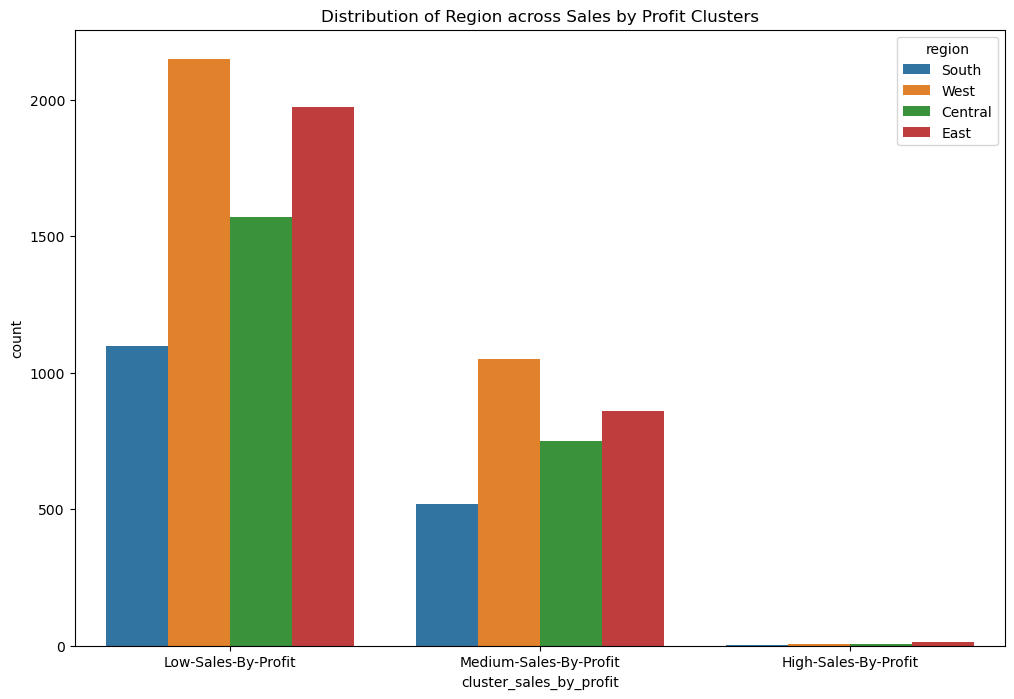

In [184]:
# Plotting bar chart of Sales and profit clusters by region
sales_profit_clusters_region_bar=plt.figure(figsize=(12, 8))
sns.countplot(x='cluster_sales_by_profit', hue='region', data=df)
plt.title('Distribution of Region across Sales by Profit Clusters')
plt.show()

# Exporting Visual
sales_profit_clusters_region_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','sales_profit_clusters_region_bar.png'))

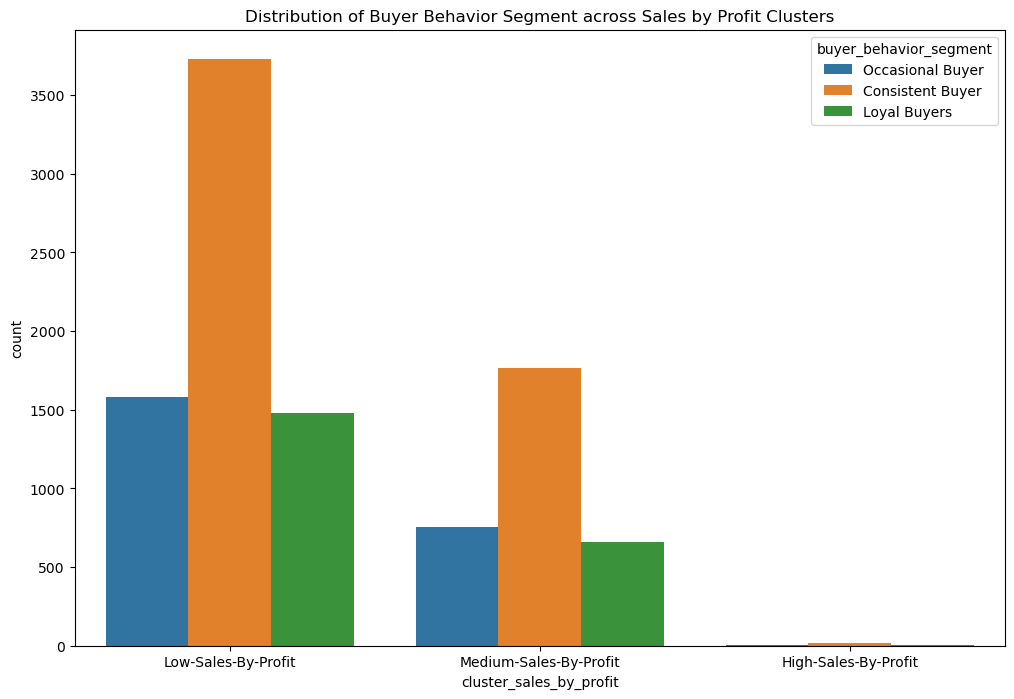

In [185]:
# Plotting bar chart of Sales and profit clusters by buyer behavior segments
sales_profit_clusters_buyer_segment_bar=plt.figure(figsize=(12, 8))
sns.countplot(x='cluster_sales_by_profit', hue='buyer_behavior_segment', data=df)
plt.title('Distribution of Buyer Behavior Segment across Sales by Profit Clusters')
plt.show()

# Exporting Visual
sales_profit_clusters_buyer_segment_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','sales_profit_clusters_buyer_segment_bar.png'))

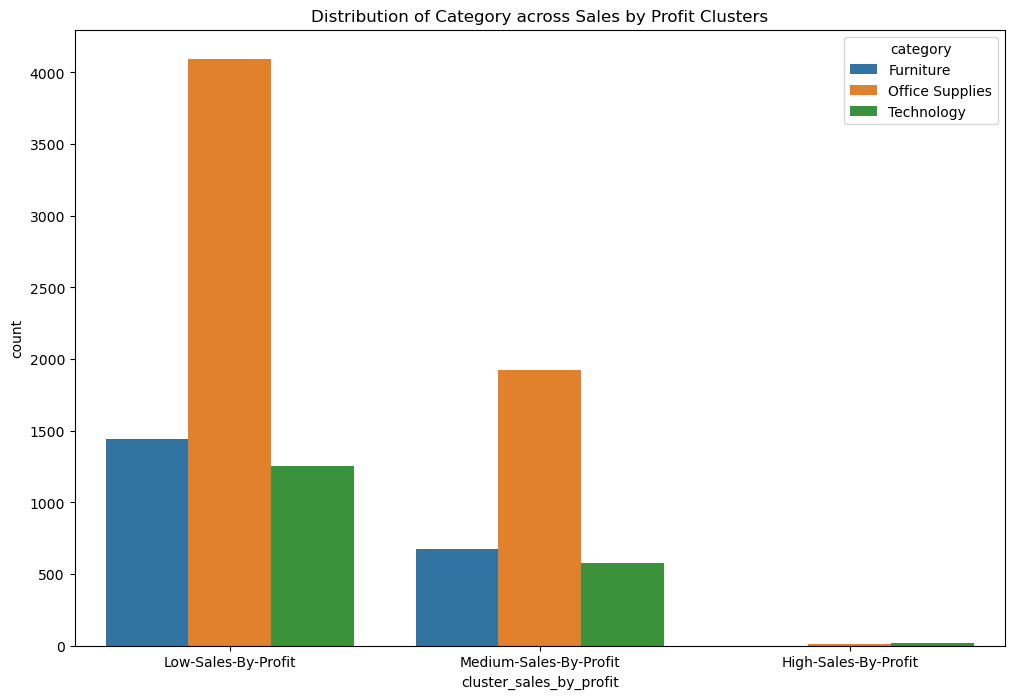

In [186]:
# Plotting bar chart of Sales and profit clusters by category
sales_profit_clusters_category_bar=plt.figure(figsize=(12, 8))
sns.countplot(x='cluster_sales_by_profit', hue='category', data=df)
plt.title('Distribution of Category across Sales by Profit Clusters')
plt.show()

# Exporting Visual
sales_profit_clusters_category_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','sales_profit_clusters_category_bar.png'))

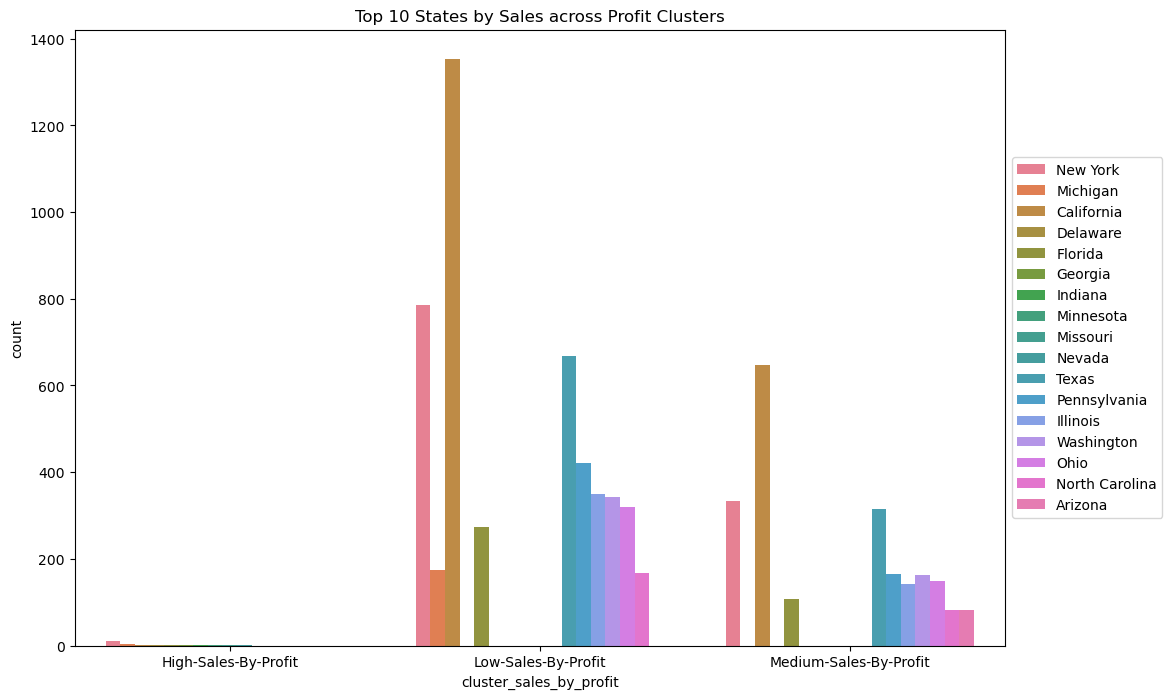

In [187]:
# Group by 'cluster_sales_by_profit' and 'state', then count the occurrences
top_states = df.groupby(['cluster_sales_by_profit', 'state']).size().reset_index(name='count')

# Sort the counts within each 'cluster_sales_by_profit' category and take the top 10
top_10_states = top_states.sort_values(['cluster_sales_by_profit', 'count'], ascending=[True, False]).groupby('cluster_sales_by_profit').head(10)

# Plotting bar chart of Sales and profit clusters by state
sales_profit_clusters_top_10_states_bar=plt.figure(figsize=(12, 8))
sns.barplot(x='cluster_sales_by_profit',y='count', hue='state', data=top_10_states)
plt.title('Top 10 States by Sales across Profit Clusters')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Exporting Visual
sales_profit_clusters_top_10_states_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','sales_profit_clusters_top_10_states_bar.png'))

### 8) Exporting Merged Dataframe with Created Cluster Columns

In [158]:
# Exporting merged dataframe of original dataframe with cluster columns

df.to_csv(os.path.join(path,'02 Data','Prepared Data','product_sales_clusters.csv'))